In [1]:
from pyNN.morphology import NeuroMLMorphology, load_morphology, uniform, random_section, dendrites, apical_dendrites, by_distance
import pyNN.arbor as sim

ModuleNotFoundError: No module named 'pyNN.arbor.standardmodels.simulator'

In [ ]:
pyr_morph = load_morphology("single_cell_detailed.swc", replace_axon=None)

In [3]:
cc = sim.MultiCompartmentNeuron.setup(
				label="MyCell",
				ion_channels={'pas': sim.PassiveLeak,
							  'na': sim.NaChannel,
							  'kdr': sim.KdrChannel},
				ionic_species={'na_ion': sim.NaIon,
							   'k_ion': sim.KIon})
mycell = cc(morphology=pyr_morph,
			cm=1.0,
			Ra=500.0,
			na_ion = {"reversal_potential": 50.0},
			k_ion = {"reversal_potential": -77.0},
			pas={"conductance_density": uniform('all', 0.0003),
				"e_rev":-54.3},
			na={"conductance_density": uniform('soma', 0.120),
			   "e_rev": 50.0},
			kdr={"conductance_density": uniform('soma', 0.036),
				"e_rev": -77.0})

In [4]:
#cells = sim.Population(1, mycell, initial_values={'v': -60.0})
cells = sim.Population(3, mycell, initial_values={'v': -60.0})

[[ 0.0e+00  0.0e+00  0.0e+00  2.0e+00]
 [ 4.0e+01  0.0e+00  0.0e+00  8.0e-01]
 [ 8.0e+01  0.0e+00  0.0e+00  8.0e-01]
 [ 1.2e+02 -5.0e+00  0.0e+00  8.0e-01]
 [ 2.0e+02  4.0e+01  0.0e+00  4.0e-01]
 [ 1.2e+02 -5.0e+00  0.0e+00  5.0e-01]
 [ 1.9e+02 -3.0e+01  0.0e+00  5.0e-01]
 [ 1.9e+02 -3.0e+01  0.0e+00  5.0e-01]
 [ 2.3e+02 -1.0e+01  0.0e+00  2.0e-01]
 [ 0.0e+00  0.0e+00  0.0e+00  2.0e+00]
 [-7.0e+01  0.0e+00  0.0e+00  4.0e-01]] [[ 4.0e+01  0.0e+00  0.0e+00  2.0e+00]
 [ 8.0e+01  0.0e+00  0.0e+00  8.0e-01]
 [ 1.2e+02 -5.0e+00  0.0e+00  8.0e-01]
 [ 2.0e+02  4.0e+01  0.0e+00  4.0e-01]
 [ 2.6e+02  6.0e+01  0.0e+00  2.0e-01]
 [ 1.9e+02 -3.0e+01  0.0e+00  5.0e-01]
 [ 2.4e+02 -7.0e+01  0.0e+00  2.0e-01]
 [ 2.3e+02 -1.0e+01  0.0e+00  2.0e-01]
 [ 3.6e+02 -2.0e+01  0.0e+00  2.0e-01]
 [-7.0e+01  0.0e+00  0.0e+00  4.0e-01]
 [-1.0e+02  0.0e+00  0.0e+00  4.0e-01]] [None, 0, 1, 2, 3, 2, 5, 5, 7, None, 9]
[[ 0.0e+00  0.0e+00  0.0e+00  2.0e+00]
 [ 4.0e+01  0.0e+00  0.0e+00  8.0e-01]
 [ 8.0e+01  0.0e+00  0

In [5]:
step_current = sim.DCSource(amplitude=5.0, start=50.0, stop=150.0)

In [6]:
step_current.inject_into(cells[0:1], location="soma")

In [7]:
cells.record('spikes')

In [8]:
# sim.run(200.0)
sim.state.run(200.0, cells)

In [9]:
sim.state.model

<arbor.single_cell_model>

In [10]:
# (8) Print spike times.
if len(sim.state.model.spikes) > 0:
    print("{} spikes:".format(len(sim.state.model.spikes)))
    for s in sim.state.model.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

no spikes


In [11]:
from matplotlib import pyplot

In [12]:
# df = pandas.DataFrame({"t/ms": m.traces[0].time, "U/mV": m.traces[0].value})
pyplot.plot(sim.state.model.traces[0].time, sim.state.model.traces[0].value)

IndexError: list index out of range

In [13]:
sim.state.model.traces

[]

In [14]:
m = sim.state.model

In [15]:
m.run(tfinal=30)

In [16]:
if len(m.spikes) > 0:
    print("{} spikes:".format(len(m.spikes)))
    for s in m.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

no spikes


In [17]:
cells

Population(3, MultiCompartmentNeuron(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='population0')

In [18]:
import arbor

In [19]:
cells.all_cells[0]._cell._arbor_morphology

In [20]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "everywhere" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (locset "root" (root)) (locset "terminal" (terminal)) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [21]:
cells.all_cells[0]._cell._decor

In [22]:
ac = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     cells.all_cells[0]._cell._decor)

In [23]:
mod = arbor.single_cell_model(ac)

In [24]:
mod.probe("voltage", '"soma_midpoint"', frequency=10)

In [25]:
mod.run(tfinal=30)

In [26]:
if len(mod.spikes) > 0:
    print("{} spikes:".format(len(mod.spikes)))
    for s in mod.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

no spikes


Make the 2nd cell in the population the "simple cell" example in Arbor documentation.

In [27]:
# (1) Create a morphology with a single (cylindrical) segment of length=diameter=6 μm
tree1 = arbor.segment_tree()
tree1.append(arbor.mnpos, arbor.mpoint(-3, 0, 0, 3), arbor.mpoint(3, 0, 0, 3), tag=1)

# (2) Define the soma and its midpoint
labels1 = arbor.label_dict({"soma": "(tag 1)", "midpoint": "(location 0 0.5)"})

# (3) Create and set up a decor object
decor1 = arbor.decor()
decor1.set_property(Vm=-40)
decor1.paint('"soma"', arbor.density('hh'))
decor1.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
decor1.place('"midpoint"', arbor.spike_detector(-10), "detector")

In [28]:
cells.all_cells[1]._cell._arbor_tree = tree1
cells.all_cells[1]._cell._arbor_labels = labels1
cells.all_cells[1]._cell._decor = decor1
cells.all_cells[1]._cell._arbor_morphology = arbor.morphology(tree1)

In [29]:
ac1 = arbor.cable_cell(cells.all_cells[1]._cell._arbor_tree,
                     cells.all_cells[1]._cell._arbor_labels,
                     cells.all_cells[1]._cell._decor)
mod1 = arbor.single_cell_model(ac1)
mod1.probe("voltage", '"midpoint"', frequency=10)

Using tree or morphology, its all the same.

In [30]:
ac1 = arbor.cable_cell(cells.all_cells[1]._cell._arbor_morphology,
                     cells.all_cells[1]._cell._arbor_labels,
                     cells.all_cells[1]._cell._decor)
mod1 = arbor.single_cell_model(ac1)
mod1.probe("voltage", '"midpoint"', frequency=10)

In [31]:
mod1.run(tfinal=30)

In [32]:
if len(mod1.spikes) > 0:
    print("{} spikes:".format(len(mod1.spikes)))
    for s in mod1.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

1 spikes:
10.084


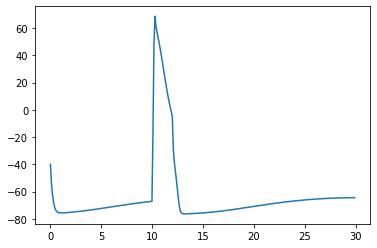

In [33]:
pyplot.plot(mod1.traces[0].time, mod1.traces[0].value)

Make the 3rd cell in the population the "detailed cell" example in Arbor documentation.

In [34]:
# (1) Create a morphology with a single (cylindrical) segment of length=diameter=6 μm
tree2 = arbor.segment_tree()
# Start with segment 0: a cylindrical soma with tag 1
tree2.append(arbor.mnpos, arbor.mpoint(0.0, 0.0, 0.0, 2.0), arbor.mpoint( 40.0, 0.0, 0.0, 2.0), tag=1)
# Construct the first section of the dendritic tree with tag 3,
# comprised of segments 1 and 2, attached to soma segment 0.
tree2.append(0,     arbor.mpoint(40.0, 0.0, 0.0, 0.8), arbor.mpoint( 80.0,  0.0, 0.0, 0.8), tag=3)
tree2.append(1,     arbor.mpoint(80.0, 0.0, 0.0, 0.8), arbor.mpoint(120.0, -5.0, 0.0, 0.8), tag=3)
# Construct the rest of the dendritic tree: segments 3, 4 and 5.
tree2.append(2,     arbor.mpoint(120.0, -5.0, 0.0, 0.8), arbor.mpoint(200.0,  40.0, 0.0, 0.4), tag=3)
tree2.append(3,     arbor.mpoint(200.0, 40.0, 0.0, 0.4), arbor.mpoint(260.0,  60.0, 0.0, 0.2), tag=3)
tree2.append(2,     arbor.mpoint(120.0, -5.0, 0.0, 0.5), arbor.mpoint(190.0, -30.0, 0.0, 0.5), tag=3)
# Construct a special region of the tree made of segments 6, 7, and 8
# differentiated from the rest of the tree using tag 4.
tree2.append(5,     arbor.mpoint(190.0, -30.0, 0.0, 0.5), arbor.mpoint(240.0, -70.0, 0.0, 0.2), tag=4)
tree2.append(5,     arbor.mpoint(190.0, -30.0, 0.0, 0.5), arbor.mpoint(230.0, -10.0, 0.0, 0.2), tag=4)
tree2.append(7,     arbor.mpoint(230.0, -10.0, 0.0, 0.2), arbor.mpoint(360.0, -20.0, 0.0, 0.2), tag=4)
# Construct segments 9 and 10 that make up the axon with tag 2.
# Segment 9 is at the root, where its proximal end will be connected to the
# proximal end of the soma segment.
tree2.append(arbor.mnpos, arbor.mpoint( 0.0, 0.0, 0.0, 2.0), arbor.mpoint(  -70.0, 0.0, 0.0, 0.4), tag=2)
tree2.append(9,     arbor.mpoint(-70.0, 0.0, 0.0, 0.4), arbor.mpoint(-100.0, 0.0, 0.0, 0.4), tag=2)

# (2) Define the soma and its midpoint
labels2 = arbor.label_dict({
  "soma": "(tag 1)",
  "axon": "(tag 2)",
  "dend": "(tag 3)",
  "apic": "(tag 4)",
  "all": "(all)",
  "midpoint": "(location 0 0.5)",
  # Add a label for the parts of the morphology with radius greater than 1.5 μm.
  "gt_1.5": '(radius-ge (region "all") 1.5)',
  # Join regions "apic" and "gt_1.5"
  "custom": '(join (region "apic") (region "gt_1.5"))',
  # Add a labels for the root of the morphology and all the terminal points
  "root": "(root)",
  "terminal": "(terminal)",
  # Add a label for the terminal locations in the "custom" region:
  "custom_terminal": '(restrict (locset "terminal") (region "custom"))',
  # Add a label for the terminal locations in the "axon" region:
  "axon_terminal": '(restrict (locset "terminal") (region "axon"))',
})

# (3) Create and set up a decor object
decor2 = arbor.decor()
# Set the default properties of the cell (this overrides the model defaults).
decor2.set_property(Vm=-55)
decor2.set_ion("na", int_con=10, ext_con=140, rev_pot=50, method="nernst/na")
decor2.set_ion("k", int_con=54.4, ext_con=2.5, rev_pot=-77)
# Override the cell defaults.
decor2.paint('"custom"', tempK=270)
decor2.paint('"soma"', Vm=-50)
# Paint density mechanisms.
decor2.paint('"all"', arbor.density("pas"))
decor2.paint('"custom"', arbor.density("hh"))
decor2.paint('"dend"', arbor.density("hh", {"gkbar": 0.001}))
# Place stimuli and detectors.
decor2.place('"root"', arbor.iclamp(10, 1, current=2), "iclamp0")
decor2.place('"root"', arbor.iclamp(30, 1, current=2), "iclamp1")
decor2.place('"root"', arbor.iclamp(50, 1, current=2), "iclamp2")
#decor.place('"axon_terminal"', arbor.threshold_detector(-10), "detector")
decor2.place('"axon_terminal"', arbor.spike_detector(-10), "detector")

#decor2.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
#decor2.place('"midpoint"', arbor.spike_detector(-10), "detector")

In [35]:
cells.all_cells[2]._cell._arbor_tree = tree2
cells.all_cells[2]._cell._arbor_labels = labels2
cells.all_cells[2]._cell._decor = decor2
cells.all_cells[2]._cell._arbor_morphology = arbor.morphology(tree2)

In [36]:
ac2 = arbor.cable_cell(cells.all_cells[2]._cell._arbor_morphology,
                     cells.all_cells[2]._cell._arbor_labels,
                     cells.all_cells[2]._cell._decor)
mod2 = arbor.single_cell_model(ac2)
mod2.probe("voltage", '"midpoint"', frequency=10)

In [37]:
mod2.run(tfinal=100, dt=0.025)

In [38]:
print(len(mod2.spikes), "spikes recorded:")
for s in mod2.spikes:
    print(s)

3 spikes recorded:
10.784431020623357
30.81276109104436
50.81473747337763


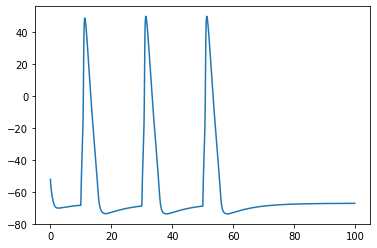

In [39]:
pyplot.plot(mod2.traces[0].time, mod2.traces[0].value)

The trees above (manually created) and generated by the backend appear to be the same.

In [40]:
cells.all_cells[2]._cell._arbor_tree.size

11

In [41]:
cells.all_cells[0]._cell._arbor_tree.size

11

In [42]:
cells.all_cells[2]._cell._arbor_tree.segments

In [43]:
cells.all_cells[0]._cell._arbor_tree.segments

Backend Morphology Works

In [44]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[2]._cell._arbor_labels,
                     cells.all_cells[2]._cell._decor)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"midpoint"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

0 spikes recorded:


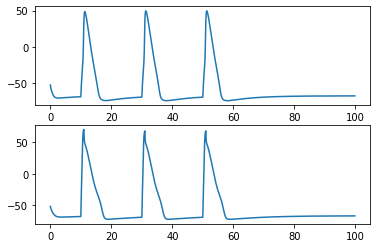

In [45]:
ax1 = pyplot.subplot(211)
ax1.plot(mod2.traces[0].time, mod2.traces[0].value)

ax2 = pyplot.subplot(212, sharex=ax1)
ax2.plot(modX.traces[0].time, modX.traces[0].value)

pyplot.show()

Renaming the decor (labels in decor) does not work

In [5]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "everywhere" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (locset "root" (root)) (locset "terminal" (terminal)) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [ ]:
# (3) Create and set up a decor object
decorX = arbor.decor()
# Set the default properties of the cell (this overrides the model defaults).
decorX.set_property(Vm=-55)
decorX.set_ion("na", int_con=10, ext_con=140, rev_pot=50, method="nernst/na")
decorX.set_ion("k", int_con=54.4, ext_con=2.5, rev_pot=-77)
# Override the cell defaults.
decorX.paint('"soma"', tempK=270)  # since there are no custom label
decorX.paint('"soma"', Vm=-50)
# Paint density mechanisms.
decorX.paint('"everywhere"', arbor.density("pas"))  # since no all
decorX.paint('"soma"', arbor.density("hh"))
decorX.paint('"basal_dendrite"', arbor.density("hh", {"gkbar": 0.001}))  # since no dend
# Place stimuli and detectors.
decorX.place('"soma_midpoint"', arbor.iclamp(10, 1, current=2), "iclamp0")  # since no root label
decorX.place('"soma_midpoint"', arbor.iclamp(30, 1, current=2), "iclamp1")
decorX.place('"soma_midpoint"', arbor.iclamp(50, 1, current=2), "iclamp2")
#decor.place('"axon_terminal"', arbor.threshold_detector(-10), "detector")
#decorX.place('"apical_dendrite_midpoint"', arbor.spike_detector(-10), "detector")  # since no axon_terminal

#decorX.place('"soma_midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")  # since no midpoint label
decorX.place('"soma_midpoint"', arbor.spike_detector(-10), "detector")

In [ ]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     decorX)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"soma_midpoint"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

How about adding/appending labels?

In [ ]:
cells.all_cells[0]._cell._arbor_labels

In [ ]:
cells.all_cells[0]._cell._arbor_labels["axon"] = "(tag 2)"
cells.all_cells[0]._cell._arbor_labels["dend"] = "(tag 3)"
cells.all_cells[0]._cell._arbor_labels["apic"] = "(tag 4)"
cells.all_cells[0]._cell._arbor_labels["all"] = "(all)"
cells.all_cells[0]._cell._arbor_labels["midpoint"] = "(location 0 0.5)"
  # Add a label for the parts of the morphology with radius greater than 1.5 μm.
cells.all_cells[0]._cell._arbor_labels["gt_1.5"] = '(radius-ge (region "all") 1.5)'
  # Join regions "apic" and "gt_1.5"
cells.all_cells[0]._cell._arbor_labels["custom"] = '(join (region "apic") (region "gt_1.5"))'
  # Add a labels for the root of the morphology and all the terminal points
cells.all_cells[0]._cell._arbor_labels["root"] = "(root)"
cells.all_cells[0]._cell._arbor_labels["terminal"] = "(terminal)"
  # Add a label for the terminal locations in the "custom" region:
cells.all_cells[0]._cell._arbor_labels["custom_terminal"] = '(restrict (locset "terminal") (region "custom"))'
  # Add a label for the terminal locations in the "axon" region:
cells.all_cells[0]._cell._arbor_labels["axon_terminal"] = '(restrict (locset "terminal") (region "axon"))'

In [ ]:
cells.all_cells[0]._cell._arbor_labels

In [ ]:
# (3) Create and set up a decor object
decorX = arbor.decor()
# Set the default properties of the cell (this overrides the model defaults).
decorX.set_property(Vm=-55)
decorX.set_ion("na", int_con=10, ext_con=140, rev_pot=50, method="nernst/na")
decorX.set_ion("k", int_con=54.4, ext_con=2.5, rev_pot=-77)
# Override the cell defaults.
decorX.paint('"custom"', tempK=270)
decorX.paint('"soma"', Vm=-50)
# Paint density mechanisms.
decorX.paint('"all"', arbor.density("pas"))
decorX.paint('"custom"', arbor.density("hh"))
decorX.paint('"dend"', arbor.density("hh", {"gkbar": 0.001}))
# Place stimuli and detectors.
decorX.place('"root"', arbor.iclamp(10, 1, current=2), "iclamp0")
decorX.place('"root"', arbor.iclamp(30, 1, current=2), "iclamp1")
decorX.place('"root"', arbor.iclamp(50, 1, current=2), "iclamp2")
#decor.place('"axon_terminal"', arbor.threshold_detector(-10), "detector")
decorX.place('"axon_terminal"', arbor.spike_detector(-10), "detector")

#decorX.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
#decorX.place('"midpoint"', arbor.spike_detector(-10), "detector")

In [ ]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     decorX)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"axon_terminal"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

In [ ]:
pyplot.plot(modX.traces[0].time, modX.traces[0].value)

In [ ]:
mod2.spikes

In [ ]:
mod1.spikes

In [ ]:
modX.spikes

In [ ]:
pyplot.plot(modX.traces[0].time, modX.traces[0].value)

In [46]:
cells.all_cells[0]._cell.morphology

In [7]:
from pyNN.arbor.procedures.swc_tags_names import get_name, get_swc_tag

In [8]:
for swc_tag, array_morph in cells.all_cells[0]._cell.morphology.section_groups.items():
    print(swc_tag, get_name(swc_tag))

2 axon
3 basal_dendrite
4 apical_dendrite


In [5]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "everywhere" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (locset "root" (root)) (locset "terminal" (terminal)) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [50]:
from pyNN.arbor.procedures.step1 import CreateBackendSegments

In [51]:
nmlmorph = CreateBackendSegments(cells.all_cells[0]._cell.morphology)

In [53]:
for indx, nml_seg in enumerate(nmlmorph.backend_segments):
    tag_no = get_swc_tag(nml_seg)
    print(nml_seg.name, tag_no)

soma 1
basal_dendrite 3
basal_dendrite 3
basal_dendrite 3
basal_dendrite 3
basal_dendrite 3
basal_dendrite 3
basal_dendrite 3
apical_dendrite 4
apical_dendrite 4
apical_dendrite 4


In [55]:
for indx, nml_seg in enumerate(nmlmorph.segments):
    print(nml_seg)

<Segment|1|soma>
<Segment|2|basal_dendrite>
<Segment|3|basal_dendrite>
<Segment|4|basal_dendrite>
<Segment|5|basal_dendrite>
<Segment|6|basal_dendrite>
<Segment|7|basal_dendrite>
<Segment|8|basal_dendrite>
<Segment|9|apical_dendrite>
<Segment|10|apical_dendrite>
<Segment|11|apical_dendrite>
<Segment|12>
<Segment|13>


In [56]:
for swc_tag, array_morph in nmlmorph.section_groups.items():
    print(swc_tag, get_name(swc_tag))

2 axon
3 basal_dendrite
4 apical_dendrite


In [57]:
nmlmorph.section_groups.keys()

dict_keys([2, 3, 4])

In [59]:
nmlmorph.section_groups

{2: array([12, 13]), 3: array([2, 3, 4, 5, 6, 7, 8]), 4: array([ 9, 10, 11])}

In [63]:
for swc_tag, sect_group in nmlmorph.section_groups.items():
    print(swc_tag, sect_group)

2 [12 13]
3 [2 3 4 5 6 7 8]
4 [ 9 10 11]


In [65]:
nmlmorph.section_groups[3][0]

2

In [66]:
nmlmorph.segments[nmlmorph.section_groups[3][0]]

<Segment|3|basal_dendrite>

In [68]:
nmlmorph.section_groups.values()

dict_values([array([12, 13]), array([2, 3, 4, 5, 6, 7, 8]), array([ 9, 10, 11])])

In [69]:
seg_id = 13
for swc_tag in nmlmorph.section_groups.keys():
    if seg_id in nmlmorph.section_groups[swc_tag]:
        print(swc_tag)

2


In [70]:
for indx, nml_seg in enumerate(nmlmorph.segments):
    print(nml_seg)

<Segment|1|soma>
<Segment|2|basal_dendrite>
<Segment|3|basal_dendrite>
<Segment|4|basal_dendrite>
<Segment|5|basal_dendrite>
<Segment|6|basal_dendrite>
<Segment|7|basal_dendrite>
<Segment|8|basal_dendrite>
<Segment|9|apical_dendrite>
<Segment|10|apical_dendrite>
<Segment|11|apical_dendrite>
<Segment|12>
<Segment|13>


In [72]:
help(nmlmorph.segments[0])

Help on Segment in module neuroml.nml.nml object:

class Segment(BaseNonNegativeIntegerId)
 |  Segment(neuro_lex_id=None, id=None, name=None, parent=None, proximal=None, distal=None, **kwargs_)
 |  
 |  Anything which can have a unique (within its parent) id, which must
 |  be an integer zero or greater.
 |  
 |  Method resolution order:
 |      Segment
 |      BaseNonNegativeIntegerId
 |      BaseWithoutId
 |      GeneratedsSuper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, neuro_lex_id=None, id=None, name=None, parent=None, proximal=None, distal=None, **kwargs_)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  build(self, node)
 |  
 |  buildAttributes(self, node, attrs, already_processed)
 |  
 |  buildChildren(self, child_, node, nodeName_, fromsubclass_=False)
 |  
 |  export(self, outfile, level, namespaceprefix_='', 

In [75]:
nmlmorph.segments[0].id

1

In [7]:
pyr_morph

In [4]:
from pyNN.arbor.procedures.swc_tags_names import extract_swc_tag_from_neuroml

In [6]:
for i, nml_seg in enumerate(pyr_morph.segments):
    x = extract_swc_tag_from_neuroml(nml_seg.id, pyr_morph)
    print(x)

KeyError: None

In [7]:
for i, nml_seg in enumerate(pyr_morph.segments):
    print(nml_seg.id)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [12]:
seg_id_as_array_element = 1

swc_tag = None
for ky in pyr_morph.section_groups.keys():
    if seg_id_as_array_element in pyr_morph.section_groups[ky]:
        swc_tag = ky
if swc_tag is None:
    print(1)
else:
    print(swc_tag)

1


In [10]:
from pyNN.arbor.procedures.swc_tags_names import extract_swc_tag_from_neuroml
import re

In [11]:
def create_region_definitions(neuroml_morphology):
    # Arbor uses a domains specific language (DSL) to describe regions and locations, which are given labels.
    dict_defs = {"everywhere": "(all)", "root": "(root)", "terminal": "(terminal)"}
    for indx, nml_seg in enumerate(neuroml_morphology.backend_segments):
        tag_no = extract_swc_tag_from_neuroml(nml_seg.id, neuroml_morphology)  # tag_no = get_swc_tag(nml_seg)
        # print(nml_seg.name)
        dict_defs.update({nml_seg.name: "(tag " + str(tag_no) + ")"})
        # (restrict (on-branches 0.5) (tag 3)) for spike detection and voltage probe for undefined locations
        dict_defs.update({nml_seg.name + "_midpoint": "(restrict (on-branches 0.5) (tag " + str(tag_no) + "))"})
        if re.search("axon", nml_seg.name, re.IGNORECASE):
            # "axon_terminal": '(restrict (locset "terminal") (region "axon"))'
            dict_defs.update({nml_seg.name + "_midpoint":
                                  "(restrict (locset 'terminal') (region '" + nml_seg.name + "'))"})
    return dict_defs

In [12]:
nmlmorph = cells.all_cells[0]._cell.morphology

In [13]:
create_region_definitions(nmlmorph)

{'everywhere': '(all)',
 'root': '(root)',
 'terminal': '(terminal)',
 'soma': '(tag 1)',
 'soma_midpoint': '(restrict (on-branches 0.5) (tag 1))',
 'basal_dendrite': '(tag 3)',
 'basal_dendrite_midpoint': '(restrict (on-branches 0.5) (tag 3))',
 'apical_dendrite': '(tag 4)',
 'apical_dendrite_midpoint': '(restrict (on-branches 0.5) (tag 4))'}

In [14]:
for indx, nml_seg in enumerate(nmlmorph.backend_segments):
    print(nml_seg.id, extract_swc_tag_from_neuroml(nml_seg.id, nmlmorph))

1 1
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 4
10 4
11 4


In [15]:
nmlmorph.section_groups

{2: array([12, 13]), 3: array([2, 3, 4, 5, 6, 7, 8]), 4: array([ 9, 10, 11])}

In [16]:
for indx, nml_seg in enumerate(nmlmorph.segments):
    print(nml_seg.id, extract_swc_tag_from_neuroml(nml_seg.id, nmlmorph))

1 1
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 4
10 4
11 4
12 2
13 2


In [17]:
cells.all_cells[0]._cell._arbor_tree

In [18]:
nmlmorph.segments[0].proximal, [nmlmorph.segments[0].distal], nmlmorph.segments[0].id 

((0.0, 0.0, 0.0), diam 2.0um, [(40.0, 0.0, 0.0), diam 2.0um], 1)

In [19]:
for i in range(len(nmlmorph.segments)):
    print(nmlmorph.segments[i].proximal, [nmlmorph.segments[i].distal], nmlmorph.segments[i].id,
          extract_swc_tag_from_neuroml(nmlmorph.segments[i].id, nmlmorph))

(0.0, 0.0, 0.0), diam 2.0um [(40.0, 0.0, 0.0), diam 2.0um] 1 1
(40.0, 0.0, 0.0), diam 0.8um [(80.0, 0.0, 0.0), diam 0.8um] 2 3
(80.0, 0.0, 0.0), diam 0.8um [(120.0, -5.0, 0.0), diam 0.8um] 3 3
(120.0, -5.0, 0.0), diam 0.8um [(200.0, 40.0, 0.0), diam 0.4um] 4 3
(200.0, 40.0, 0.0), diam 0.4um [(260.0, 60.0, 0.0), diam 0.2um] 5 3
(120.0, -5.0, 0.0), diam 0.5um [(190.0, -30.0, 0.0), diam 0.5um] 6 3
(190.0, -30.0, 0.0), diam 0.5um [(240.0, -70.0, 0.0), diam 0.2um] 7 3
(190.0, -30.0, 0.0), diam 0.5um [(230.0, -10.0, 0.0), diam 0.2um] 8 3
(230.0, -10.0, 0.0), diam 0.2um [(360.0, -20.0, 0.0), diam 0.2um] 9 4
(0.0, 0.0, 0.0), diam 2.0um [(-70.0, 0.0, 0.0), diam 0.4um] 10 4
(-70.0, 0.0, 0.0), diam 0.4um [(-100.0, 0.0, 0.0), diam 0.4um] 11 4
(-70.0, 0.0, 0.0), diam 0.4000000059604645um [(0.0, 0.0, 0.0), diam 2.0um] 12 2
(-100.0, 0.0, 0.0), diam 0.4000000059604645um [(-70.0, 0.0, 0.0), diam 0.4000000059604645um] 13 2


In [20]:
for i in range(len(nmlmorph.backend_segments)):  # [1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4, 2]
    print(nmlmorph.backend_segments[i].proximal, [nmlmorph.backend_segments[i].distal], nmlmorph.backend_segments[i].id,
          extract_swc_tag_from_neuroml(nmlmorph.backend_segments[i].id, nmlmorph))

(0.0, 0.0, 0.0), diam 2.0um [(40.0, 0.0, 0.0), diam 2.0um] 1 1
(40.0, 0.0, 0.0), diam 0.8um [(80.0, 0.0, 0.0), diam 0.8um] 2 3
(80.0, 0.0, 0.0), diam 0.8um [(120.0, -5.0, 0.0), diam 0.8um] 3 3
(120.0, -5.0, 0.0), diam 0.8um [(200.0, 40.0, 0.0), diam 0.4um] 4 3
(200.0, 40.0, 0.0), diam 0.4um [(260.0, 60.0, 0.0), diam 0.2um] 5 3
(120.0, -5.0, 0.0), diam 0.5um [(190.0, -30.0, 0.0), diam 0.5um] 6 3
(190.0, -30.0, 0.0), diam 0.5um [(240.0, -70.0, 0.0), diam 0.2um] 7 3
(190.0, -30.0, 0.0), diam 0.5um [(230.0, -10.0, 0.0), diam 0.2um] 8 3
(230.0, -10.0, 0.0), diam 0.2um [(360.0, -20.0, 0.0), diam 0.2um] 9 4
(0.0, 0.0, 0.0), diam 2.0um [(-70.0, 0.0, 0.0), diam 0.4um] 10 4
(-70.0, 0.0, 0.0), diam 0.4um [(-100.0, 0.0, 0.0), diam 0.4um] 11 4


In [21]:
nmlmorph.segments

In [23]:
nmlmorph.backend_segments[0].distal == nmlmorph.segments[0].distal

True

In [24]:
for indx, nml_seg in enumerate(nmlmorph.segments):
    if nmlmorph.backend_segments[0].distal == nml_seg.distal:
        print(nml_seg.id, extract_swc_tag_from_neuroml(nmlmorph.backend_segments[i].id, nmlmorph))

1 4


In [25]:
for i in range(11):
    for indx, nml_seg in enumerate(nmlmorph.segments):
        if nmlmorph.backend_segments[i].distal == nml_seg.distal:
            print(nml_seg.id, extract_swc_tag_from_neuroml(nml_seg.id, nmlmorph))

1 1
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 4
10 4
13 2
11 4


In [26]:
nmlmorph.backend_segments[10].distal

(-100.0, 0.0, 0.0), diam 0.4um

In [27]:
for indx, nml_seg in enumerate(nmlmorph.segments):
    if nmlmorph.backend_segments[i].distal == nml_seg.distal:
        print(nml_seg.id)

11


In [35]:
nmlmorph.backend_segments[10].distal.__dict__

{'original_tagname_': None,
 'parent_object_': None,
 'x': -100.0,
 'y': 0.0,
 'z': 0.0,
 'diameter': 0.4}

In [36]:
for i in range(len(pyr_morph.segments)):
    print(pyr_morph.segments[i].proximal, [pyr_morph.segments[i].distal], pyr_morph.segments[i].id,
          extract_swc_tag_from_neuroml(pyr_morph.segments[i].id, pyr_morph))

(0.0, 0.0, 0.0), diam 2.0um [(40.0, 0.0, 0.0), diam 2.0um] 1 1
(40.0, 0.0, 0.0), diam 0.8um [(80.0, 0.0, 0.0), diam 0.8um] 2 3
(80.0, 0.0, 0.0), diam 0.8um [(120.0, -5.0, 0.0), diam 0.8um] 3 3
(120.0, -5.0, 0.0), diam 0.8um [(200.0, 40.0, 0.0), diam 0.4um] 4 3
(200.0, 40.0, 0.0), diam 0.4um [(260.0, 60.0, 0.0), diam 0.2um] 5 3
(120.0, -5.0, 0.0), diam 0.5um [(190.0, -30.0, 0.0), diam 0.5um] 6 3
(190.0, -30.0, 0.0), diam 0.5um [(240.0, -70.0, 0.0), diam 0.2um] 7 3
(190.0, -30.0, 0.0), diam 0.5um [(230.0, -10.0, 0.0), diam 0.2um] 8 3
(230.0, -10.0, 0.0), diam 0.2um [(360.0, -20.0, 0.0), diam 0.2um] 9 4
(0.0, 0.0, 0.0), diam 2.0um [(-70.0, 0.0, 0.0), diam 0.4um] 10 4
(-70.0, 0.0, 0.0), diam 0.4um [(-100.0, 0.0, 0.0), diam 0.4um] 11 4
(-70.0, 0.0, 0.0), diam 0.4000000059604645um [(0.0, 0.0, 0.0), diam 2.0um] 12 2
(-100.0, 0.0, 0.0), diam 0.4000000059604645um [(-70.0, 0.0, 0.0), diam 0.4000000059604645um] 13 2


In [41]:
for i in range(len(pyr_morph.segments)):
    print(pyr_morph.segments[i].id, pyr_morph.segments[i].proximal, [pyr_morph.segments[i].distal])

1 (0.0, 0.0, 0.0), diam 2.0um [(40.0, 0.0, 0.0), diam 2.0um]
2 (40.0, 0.0, 0.0), diam 0.8um [(80.0, 0.0, 0.0), diam 0.8um]
3 (80.0, 0.0, 0.0), diam 0.8um [(120.0, -5.0, 0.0), diam 0.8um]
4 (120.0, -5.0, 0.0), diam 0.8um [(200.0, 40.0, 0.0), diam 0.4um]
5 (200.0, 40.0, 0.0), diam 0.4um [(260.0, 60.0, 0.0), diam 0.2um]
6 (120.0, -5.0, 0.0), diam 0.5um [(190.0, -30.0, 0.0), diam 0.5um]
7 (190.0, -30.0, 0.0), diam 0.5um [(240.0, -70.0, 0.0), diam 0.2um]
8 (190.0, -30.0, 0.0), diam 0.5um [(230.0, -10.0, 0.0), diam 0.2um]
9 (230.0, -10.0, 0.0), diam 0.2um [(360.0, -20.0, 0.0), diam 0.2um]
10 (0.0, 0.0, 0.0), diam 2.0um [(-70.0, 0.0, 0.0), diam 0.4um]
11 (-70.0, 0.0, 0.0), diam 0.4um [(-100.0, 0.0, 0.0), diam 0.4um]
12 (-70.0, 0.0, 0.0), diam 0.4000000059604645um [(0.0, 0.0, 0.0), diam 2.0um]
13 (-100.0, 0.0, 0.0), diam 0.4000000059604645um [(-70.0, 0.0, 0.0), diam 0.4000000059604645um]


In [43]:
pyr_morph.section_groups

{2: array([12, 13]), 3: array([2, 3, 4, 5, 6, 7, 8]), 4: array([ 9, 10, 11])}

In [42]:
for swc_tag, sect_group in pyr_morph.section_groups.items():
    print(swc_tag, sect_group)

2 [12 13]
3 [2 3 4 5 6 7 8]
4 [ 9 10 11]


In [44]:
for indx, nml_seg in enumerate(pyr_morph.segments):
    print(indx, nml_seg)

0 <Segment|1|soma>
1 <Segment|2|basal_dendrite>
2 <Segment|3|basal_dendrite>
3 <Segment|4|basal_dendrite>
4 <Segment|5|basal_dendrite>
5 <Segment|6|basal_dendrite>
6 <Segment|7|basal_dendrite>
7 <Segment|8|basal_dendrite>
8 <Segment|9|apical_dendrite>
9 <Segment|10|apical_dendrite>
10 <Segment|11|apical_dendrite>
11 <Segment|12>
12 <Segment|13>


In [45]:
arraymorph = pyr_morph._morphology

In [49]:
import numpy

In [54]:
def add_parent_id(parn, parn_dist, points_3d, points_root):
    # M3.vertices[0][:3].shape[0] == M3.vertices[0][:3].size
    if parn_dist.shape[0] == parn_dist.size:
        if numpy.count_nonzero(parn_dist == points_3d) == 3:
            k = 0
            parn.append(k)
    else:
        # chk = (parn_dist == M3.vertices[i+1][:3]).all(axis=1)
        chk = (parn_dist == points_3d).all(axis=1)
        if numpy.count_nonzero(chk) != 0:
            k = numpy.where((parn_dist == points_3d).all(1))[0][0]
            parn.append(k)
        elif numpy.count_nonzero(chk) == 0:
            if numpy.count_nonzero(points_3d == points_root) == 3:
                parn.append(None)
    return parn

def get_segments_info(arraymorph):  # SHOULD THIS ALSO BE IN morphology.py API?
    #arraymorph = self.neuromlmorph._morphology # arraymorph = cls.morphology._morphology
    # setup
    prox = arraymorph.vertices[0]  # initialize array of proximal points of each segment
    dist = arraymorph.vertices[1]  # initialize array of distal points of each segment
    parn_dist = arraymorph.vertices[1][:3]  # initialize array of only distal 3D points for each segment
    parn = [None]  # initialize array of parent id for each segment
    for i in range(2, len(arraymorph.vertices) - 1):
        if arraymorph.connectivity[i] < arraymorph.connectivity[i + 1]:
            prox = numpy.vstack((prox, arraymorph.vertices[i]))  # creates column vector of m = no. of segments
            dist = numpy.vstack((dist, arraymorph.vertices[i + 1]))  # ditto
            parn = add_parent_id(parn, parn_dist, arraymorph.vertices[i][:3], prox[0, :3])  # appends list
            parn_dist = numpy.vstack((parn_dist, arraymorph.vertices[i + 1][:3]))  # column vector of shape (m,)
        elif arraymorph.connectivity[i] == arraymorph.connectivity[i + 1]:
            j = i - 1
            while arraymorph.connectivity[j] == arraymorph.connectivity[i + 1]:
                j = j - 1
            prox = numpy.vstack((prox, arraymorph.vertices[j]))
            dist = numpy.vstack((dist, arraymorph.vertices[i + 1]))
            parn = add_parent_id(parn, parn_dist, arraymorph.vertices[j][:3], prox[0, :3])
            parn_dist = numpy.vstack((parn_dist, arraymorph.vertices[i + 1][:3]))
        elif arraymorph.connectivity[i + 1] == 0:
            j = arraymorph.connectivity[i + 1]
            prox = numpy.vstack((prox, arraymorph.vertices[j]))
            dist = numpy.vstack((dist, arraymorph.vertices[i + 1]))
            parn = add_parent_id(parn, parn_dist, arraymorph.vertices[j][:3], prox[0, :3])
            parn_dist = numpy.vstack((parn_dist, arraymorph.vertices[i + 1][:3]))
    return prox, dist, parn  # all three arrays must have same length

In [55]:
p, d, pr = get_segments_info(arraymorph)

In [56]:
p

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  2.0e+00],
       [ 4.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 8.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  8.0e-01],
       [ 2.0e+02,  4.0e+01,  0.0e+00,  4.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  5.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 2.3e+02, -1.0e+01,  0.0e+00,  2.0e-01],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  2.0e+00],
       [-7.0e+01,  0.0e+00,  0.0e+00,  4.0e-01]], dtype=float32)

In [57]:
pr

[None, 0, 1, 2, 3, 2, 5, 5, 7, None, 9]

In [58]:
arraymorph.vertices[0]

array([0., 0., 0., 2.], dtype=float32)

In [67]:
arraymorph.connectivity[0]

-1

In [74]:
arraymorph.

AttributeError: 'ArrayMorphology' object has no attribute 'tag'

In [62]:
arraymorph.vertices[1]

array([40.,  0.,  0.,  2.], dtype=float32)

In [76]:
a = numpy.array([1, 2, 3, 4, 8, 6, 7, 3, 9, 10])
 
# display index value of 3
print("All index value of 3 is: ", numpy.where(a == 3))

All index value of 3 is:  (array([2, 7]),)


In [77]:
p

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  2.0e+00],
       [ 4.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 8.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  8.0e-01],
       [ 2.0e+02,  4.0e+01,  0.0e+00,  4.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  5.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 2.3e+02, -1.0e+01,  0.0e+00,  2.0e-01],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  2.0e+00],
       [-7.0e+01,  0.0e+00,  0.0e+00,  4.0e-01]], dtype=float32)

In [78]:
len(p)

11

In [79]:
for indx, nml_seg in enumerate(pyr_morph.segments):
    print(indx, nml_seg)

0 <Segment|1|soma>
1 <Segment|2|basal_dendrite>
2 <Segment|3|basal_dendrite>
3 <Segment|4|basal_dendrite>
4 <Segment|5|basal_dendrite>
5 <Segment|6|basal_dendrite>
6 <Segment|7|basal_dendrite>
7 <Segment|8|basal_dendrite>
8 <Segment|9|apical_dendrite>
9 <Segment|10|apical_dendrite>
10 <Segment|11|apical_dendrite>
11 <Segment|12>
12 <Segment|13>


In [80]:
pyr_morph.segments[0]

<Segment|1|soma>

In [81]:
pyr_morph.segments[0].proximal

(0.0, 0.0, 0.0), diam 2.0um

In [82]:
pyr_morph.segments[0].proximal.x

0.0

In [83]:
p[0]

array([0., 0., 0., 2.], dtype=float32)

In [89]:
numpy.array([pyr_morph.segments[0].proximal.x, pyr_morph.segments[0].proximal.y, pyr_morph.segments[0].proximal.z])

array([0., 0., 0.], dtype=float32)

In [91]:
p[0][3]

2.0

In [93]:
pyr_morph.segments[0].proximal.diameter

2.0

In [94]:
if [1,2,3]==[1,2,3] and [3,4,5]==[3,4,5]:
    print("equal")

equal


In [95]:
a = []

In [96]:
a.append(1)

In [97]:
a

[1]

In [98]:
def assign_tag(neuromlmorph, proxarray, distarray):
    tagarray = []
    for i in range(len(proxarray)):  # Both Arrays have same size
        prox = proxarray[i]
        x = prox[0]
        dist = distarray[i]
        for indx, nml_seg in enumerate(neuromlmorph.segments):
            if [prox[0], prox[1], prox[2], prox[3]] == \
                    [nml_seg.distal.x, nml_seg.distal.y, nml_seg.distal.z, nml_seg.distal.diameter] \
                    and \
                    [dist[0], dist[1], dist[2], dist[3]] == \
                    [nml_seg.proximal.x, nml_seg.proximal.y, nml_seg.proximal.z, nml_seg.proximal.diameter]:
                tagarray.append(extract_swc_tag_from_neuroml(nml_seg.id, neuromlmorph))
            elif [prox[0], prox[1], prox[2], prox[3]] == \
                    [nml_seg.proximal.x, nml_seg.proximal.y, nml_seg.proximal.z, nml_seg.proximal.diameter] \
                    and \
                    [dist[0], dist[1], dist[2], dist[3]] == \
                    [nml_seg.distal.x, nml_seg.distal.y, nml_seg.distal.z, nml_seg.distal.diameter]:
                tagarray.append(extract_swc_tag_from_neuroml(nml_seg.id, neuromlmorph))
    return tagarray

In [100]:
assign_tag(pyr_morph, p, d)

[1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4, 2]

In [108]:
p

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  2.0e+00],
       [ 4.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 8.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  8.0e-01],
       [ 2.0e+02,  4.0e+01,  0.0e+00,  4.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  5.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 2.3e+02, -1.0e+01,  0.0e+00,  2.0e-01],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  2.0e+00],
       [-7.0e+01,  0.0e+00,  0.0e+00,  4.0e-01]], dtype=float32)

In [107]:
for i in range(len(pyr_morph.segments)): # [1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4, 2]
    print(pyr_morph.segments[i].proximal, [pyr_morph.segments[i].distal], pyr_morph.segments[i].id,
          extract_swc_tag_from_neuroml(pyr_morph.segments[i].id, pyr_morph))

(0.0, 0.0, 0.0), diam 2.0um [(40.0, 0.0, 0.0), diam 2.0um] 1 1
(40.0, 0.0, 0.0), diam 0.8um [(80.0, 0.0, 0.0), diam 0.8um] 2 3
(80.0, 0.0, 0.0), diam 0.8um [(120.0, -5.0, 0.0), diam 0.8um] 3 3
(120.0, -5.0, 0.0), diam 0.8um [(200.0, 40.0, 0.0), diam 0.4um] 4 3
(200.0, 40.0, 0.0), diam 0.4um [(260.0, 60.0, 0.0), diam 0.2um] 5 3
(120.0, -5.0, 0.0), diam 0.5um [(190.0, -30.0, 0.0), diam 0.5um] 6 3
(190.0, -30.0, 0.0), diam 0.5um [(240.0, -70.0, 0.0), diam 0.2um] 7 3
(190.0, -30.0, 0.0), diam 0.5um [(230.0, -10.0, 0.0), diam 0.2um] 8 3
(230.0, -10.0, 0.0), diam 0.2um [(360.0, -20.0, 0.0), diam 0.2um] 9 4
(0.0, 0.0, 0.0), diam 2.0um [(-70.0, 0.0, 0.0), diam 0.4um] 10 4
(-70.0, 0.0, 0.0), diam 0.4um [(-100.0, 0.0, 0.0), diam 0.4um] 11 4
(-70.0, 0.0, 0.0), diam 0.4000000059604645um [(0.0, 0.0, 0.0), diam 2.0um] 12 2
(-100.0, 0.0, 0.0), diam 0.4000000059604645um [(-70.0, 0.0, 0.0), diam 0.4000000059604645um] 13 2


In [109]:
d

array([[ 4.0e+01,  0.0e+00,  0.0e+00,  2.0e+00],
       [ 8.0e+01,  0.0e+00,  0.0e+00,  8.0e-01],
       [ 1.2e+02, -5.0e+00,  0.0e+00,  8.0e-01],
       [ 2.0e+02,  4.0e+01,  0.0e+00,  4.0e-01],
       [ 2.6e+02,  6.0e+01,  0.0e+00,  2.0e-01],
       [ 1.9e+02, -3.0e+01,  0.0e+00,  5.0e-01],
       [ 2.4e+02, -7.0e+01,  0.0e+00,  2.0e-01],
       [ 2.3e+02, -1.0e+01,  0.0e+00,  2.0e-01],
       [ 3.6e+02, -2.0e+01,  0.0e+00,  2.0e-01],
       [-7.0e+01,  0.0e+00,  0.0e+00,  4.0e-01],
       [-1.0e+02,  0.0e+00,  0.0e+00,  4.0e-01]], dtype=float32)

In [110]:
pyr_morph.section_groups

{2: array([12, 13]), 3: array([2, 3, 4, 5, 6, 7, 8]), 4: array([ 9, 10, 11])}